In [0]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

Using TensorFlow backend.


In [0]:
training=pd.read_csv('/content/train.csv')
testing=pd.read_csv('/content/test.csv')

In [0]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = training[list_classes].values
print(y)
list_sentences_train = training["comment_text"]
list_sentences_test = testing["comment_text"]
list_sentences_test[5]

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


'Thank you for understanding. I think very highly of you and would not revert without discussion.'

In [0]:
list_sentences_train[5]
print(training.head())
data = training.values
X1_train = data[:,1]
Y_train = data[:,2]
print(Y_train)
print(X1_train)

                 id  ... identity_hate
0  0000997932d777bf  ...             0
1  000103f0d9cfb60f  ...             0
2  000113f07ec002fd  ...             0
3  0001b41b1c6bb37e  ...             0
4  0001d958c54c6e35  ...             0

[5 rows x 8 columns]
[0 0 0 ... 0 0 0]
["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
 ...
 'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.'
 'And it loo

In [0]:
# Tokenization
#https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X1_train)
# (texts_to_sequences) : Transforms each text in texts to a sequence of integers. So it basically takes each word 
# in the text and replaces it with its corresponding integer value from the word_index dictionary. 
encoded = tokenizer.texts_to_sequences(X1_train)
print(X1_train[8])
print(encoded[8:9])

Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything in the article(wow they would jump on me for vandalism), I'm merely requesting that it be more encyclopedic so one can use it for school as a reference. I have been to the selective breeding page but it's almost a stub. It points to 'animal breeding' which is a short messy article that gives you no info. There must be someone around with expertise in eugenics? 93.161.107.169
[[263, 22, 1, 286, 34847, 24, 1476, 2, 6, 489, 73, 14, 9215, 2, 330, 215, 10, 1, 23, 1473, 51, 47, 2898, 15, 35, 12, 199, 73, 1051, 1060, 9, 11, 16, 57, 1390, 37, 48, 40, 81, 11, 12, 480, 17, 5, 273, 7, 18, 55, 2, 1, 4850, 8153, 27, 26, 78, 669, 5, 1368, 11, 687, 2, 96147, 96148, 53, 8, 5, 702, 7774, 23, 9, 1094, 6, 46, 468, 41, 251, 16, 159, 324, 21, 3566, 10, 13824, 3439, 4584, 3890, 4851]]


In [0]:
# Finding the maximum length for padding
max_len = 0;
for i in range(0, len(encoded)):
    if max_len < len(encoded[i]):
        max_len = len(encoded[i])

max_len = max_len + 1
print(max_len)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

1404
210338


In [0]:
#The padding being done is 'post'
# https://keras.io/preprocessing/sequence/
from sklearn.model_selection import train_test_split
padded_docs = pad_sequences(encoded, maxlen=max_len, padding='post')
print(padded_docs)
X_train, X_test, Y_train, Y_test = train_test_split( padded_docs, Y_train, test_size=0.2, random_state=42)

[[  688    75     1 ...     0     0     0]
 [96145    52  2635 ...     0     0     0]
 [  412   437    73 ...     0     0     0]
 ...
 [34278  7330  5208 ...     0     0     0]
 [    4    11   574 ...     0     0     0]
 [    4     7   134 ...     0     0     0]]


In [0]:

input_seq = Input(shape=(1404, ))


In [0]:

embed_layer1 = Embedding(vocab_size, 100, input_length=max_len)(input_seq)

In [0]:

embed_layer2 = LSTM(60, return_sequences=True,name='lstm_layer1')(embed_layer1)

In [0]:
x1 = GlobalMaxPool1D()(embed_layer2)

In [0]:
x1 = Dense(50, activation="relu")(x1)

In [0]:
#https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
x1 = Dropout(0.1)(x1)

In [0]:
x1 = Dense(1, activation="sigmoid")(x1)

In [0]:
classifier = Model(input_seq, x1)
classifier.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
print(classifier.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1404)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1404, 100)         21033800  
_________________________________________________________________
lstm_layer1 (LSTM)           (None, 1404, 60)          38640     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 21,075,541
Trainable params: 21,075,541
Non-trainable params: 0
_______________________________________________

In [0]:
print(X_train)
print(X_test)

[[14832  9031    56 ...     0     0     0]
 [  674    85   819 ...     0     0     0]
 [    1  5487     3 ...     0     0     0]
 ...
 [    7   578   172 ...     0     0     0]
 [  628  1560     7 ...     0     0     0]
 [    6    19   240 ...     0     0     0]]
[[13327    19     6 ...     0     0     0]
 [34915  1411    94 ...     0     0     0]
 [ 4070    46  4504 ...     0     0     0]
 ...
 [  345 63107   277 ...     0     0     0]
 [    5  1684   576 ...     0     0     0]
 [28891    89    20 ...     0     0     0]]


In [0]:
classifier.fit(X_train, Y_train, batch_size=512, epochs = 10, 
    verbose=1, validation_data= (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 127656 samples, validate on 31915 samples
Epoch 1/10
127656/127656 [==============================] - 548s 4ms/step - loss: 0.2881 - accuracy: 0.9051 - val_loss: 0.2059 - val_accuracy: 0.9292
Epoch 2/10
127656/127656 [==============================] - 542s 4ms/step - loss: 0.1810 - accuracy: 0.9357 - val_loss: 0.1913 - val_accuracy: 0.9269
Epoch 3/10
127656/127656 [==============================] - 549s 4ms/step - loss: 0.1328 - accuracy: 0.9531 - val_loss: 0.1190 - val_accuracy: 0.9579
Epoch 4/10
127656/127656 [==============================] - 546s 4ms/step - loss: 0.1068 - accuracy: 0.9618 - val_loss: 0.1357 - val_accuracy: 0.9450
Epoch 5/10
127656/127656 [==============================] - 545s 4ms/step - loss: 0.0933 - accuracy: 0.9660 - val_loss: 0.1466 - val_accuracy: 0.9575
Epoch 6/10
127656/127656 [==============================] - 541s 4ms/step - loss: 0.0850 - accuracy: 0.9695 - val_loss: 0.1307 - val_accuracy: 0.9621
Epoch 7/10
127656/127656 [=======================

In [0]:
predictions = classifier.predict(X_test)
print(predictions)

[[9.8374384e-03]
 [2.2425895e-04]
 [3.3932354e-03]
 ...
 [2.8121888e-04]
 [9.6315253e-01]
 [7.0216105e-04]]


In [0]:
for i in range(len(predictions)):
    if predictions[i]>0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

print(predictions)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


In [0]:
g=[]
for i in range(len(Y_test)):
  #print(Y_test[i])
  if(Y_test[i]==[1]):
    g.append(predictions[i])
print(g)

[]


In [0]:
from sklearn.metrics import confusion_matrix, classification_report

print(predictions)

Y_test = [[i] for i in Y_test]

print(Y_test)
print(classification_report(Y_test, predictions))

pd.DataFrame(
   confusion_matrix(Y_test, predictions),
   index = [['Actual', 'Actual'], ['Not Toxic', 'Toxic']],
   columns = [['Predicted', 'Predicted'], ['Not Toxic', 'Toxic']])

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0

Predicted      
                 Not Toxic Toxic
Actual Not Toxic     28628   231
       Toxic          1001  2055

roc_curve 0.8322216043104685


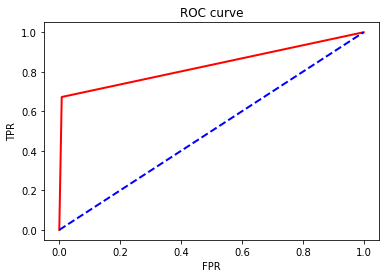

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr,_=roc_curve(Y_test,predictions)

print("roc_curve {}".format(roc_auc_score(Y_test,predictions)));

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:

for i in range(len(predictions)):
    if predictions[i]>0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score
print("accuracy {}".format(accuracy_score(Y_test,predictions)));
print(classification_report(Y_test, predictions))
pd.DataFrame(confusion_matrix(Y_test, predictions),
   index = [['Actual', 'Actual'], ['Not Toxic', 'Toxic']],
   columns = [['Predicted', 'Predicted'], ['Not Toxic', 'Toxic']])

accuracy 0.96139746200846
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28859
           1       0.90      0.67      0.77      3056

    accuracy                           0.96     31915
   macro avg       0.93      0.83      0.87     31915
weighted avg       0.96      0.96      0.96     31915



Predicted      
                 Not Toxic Toxic
Actual Not Toxic     28628   231
       Toxic          1001  2055

In [0]:
import pandas as pd
data = pd.read_csv('/content/TestFile.csv')
data = data.values
X_train = data[0:14,0]
print(X_train)
encoded = tokenizer.texts_to_sequences(X_train)
padded_docs = pad_sequences(encoded, maxlen=1404, padding='post')
print(padded_docs)
predictions = classifier.predict(padded_docs)
print(predictions)

for i in range(len(predictions)):
    if predictions[i]>0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

print(predictions)

['I do not think you are a bad human being your circumstances made you that '
 'He had killed many people in the past and would continue to kill if we do not do somehing about it'
 'You need some help, his retaeded brother was brave enough to serve in the military '
 'The word fuck is very inappropriate please refrain from using. It leaves a bad impression.'
 'The murder rates for those cities are high I would suggest looking after your family. These psychopaths are dagerous, keep yourself safe.'
 'In a time were rape and harassment are widespread, we need to stand up againt the bullies.'
 'I will kill your faimily, nice good wonderful.'
 "Slavery is forbidden in Islam?  That seems to run counter to history.  Weren't the Mamluks, simply to mention one group, former slaves?"
 'The original Homophobia in the Black Diasporic community article is god awful.  So I moved that articles information here.'
 'refuse to be open to other people and ideas'
 'The anus is, in fact, part of the penis.